In [140]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL']
data_file = 'data/stock_data.csv'

# Set up End and Start times for data grab
tech_list = ['AAPL']

end = datetime.now()
start = datetime(end.year, end.month - 1, end.day)

AAPL = ''

for stock in tech_list:
    download = yf.download(stock, start, end)
    globals()[stock] = download

ValueError: day is out of range for month

In [141]:
# print(AAPL.describe)

company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


df = pd.concat(company_list, axis=0)
df.tail(10)
df.to_csv(data_file, sep=',', index=False)
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-28  163.059998  165.419998  162.429993  165.119995  165.119995   
2022-03-01  164.699997  166.600006  161.970001  163.199997  163.199997   
2022-03-02  164.389999  167.360001  162.949997  166.559998  166.559998   
2022-03-03  168.470001  168.910004  165.550003  166.229996  166.229996   
2022-03-04  164.490005  165.550003  162.100006  163.169998  163.169998   
2022-03-07  163.360001  165.020004  159.039993  159.300003  159.300003   
2022-03-08  158.820007  162.880005  155.800003  157.440002  157.440002   
2022-03-09  161.479996  163.410004  159.410004  162.949997  162.949997   
2022-03-10  160.199997  160.389999  155.979996  158.520004  158.520004   
2022-03-11  158.929993  159.279999  154.500000  154.729996  154.729996   
2022-03-14  151.449997  154.119995  150.100006  150.619995  150.619995   
2022-03-15  150.899994  155.570007  15

In [142]:
AAPL.info()

%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2022-02-28 to 2022-03-28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            21 non-null     float64
 1   High            21 non-null     float64
 2   Low             21 non-null     float64
 3   Close           21 non-null     float64
 4   Adj Close       21 non-null     float64
 5   Volume          21 non-null     int64  
 6   company_name    21 non-null     object 
 7   MA for 10 days  12 non-null     float64
 8   MA for 20 days  2 non-null      float64
 9   MA for 50 days  0 non-null      float64
 10  Daily Return    20 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


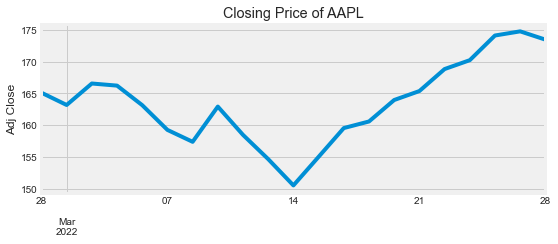

In [143]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

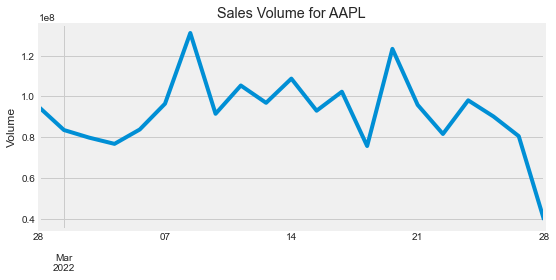

In [144]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [145]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [146]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')


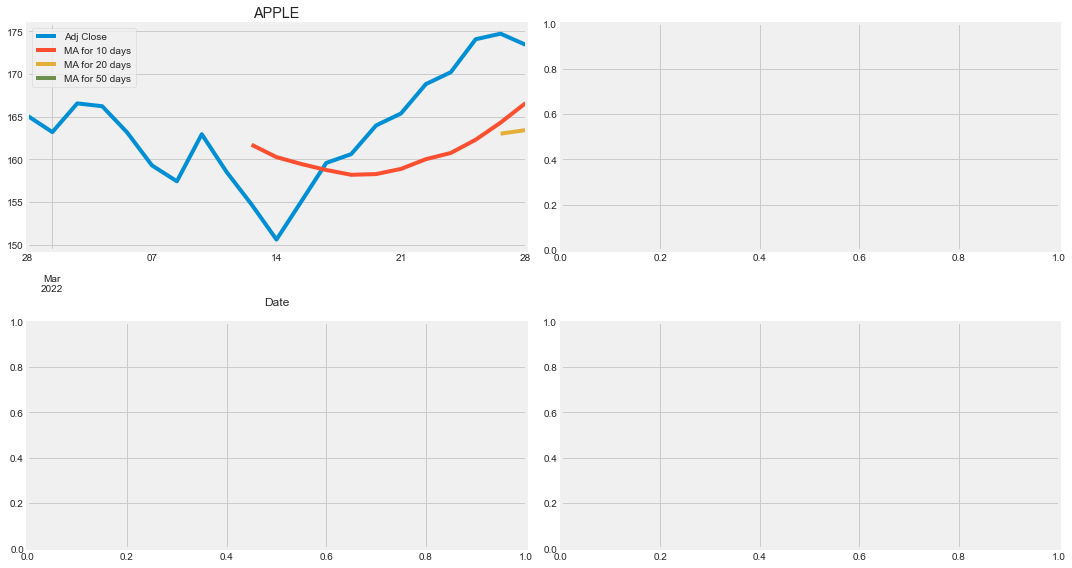

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

fig.tight_layout()

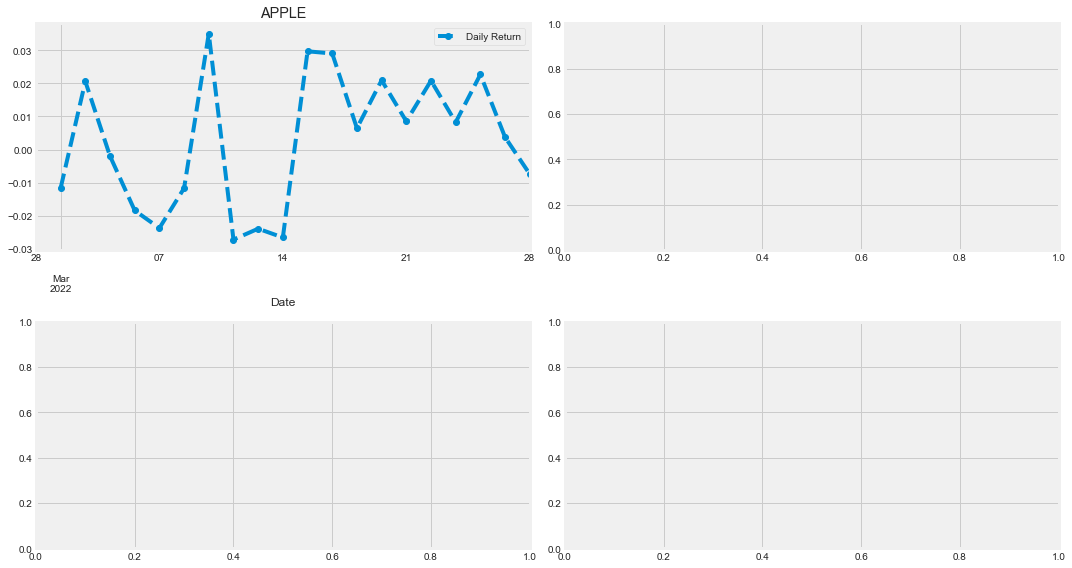

In [148]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

fig.tight_layout()

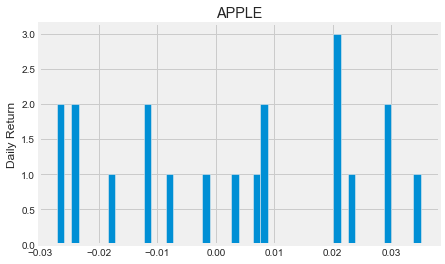

In [149]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [150]:
 # !pip install --upgrade pandas-datareader

from pandas_datareader.data import DataReader
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,AAPL
Date,
2022-02-28,165.119995
2022-03-01,163.199997
2022-03-02,166.559998
2022-03-03,166.229996
2022-03-04,163.169998


In [151]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL
Date,
2022-02-28,NaN
2022-03-01,-0.011628
2022-03-02,0.020588
2022-03-03,-0.001981
2022-03-04,-0.018408


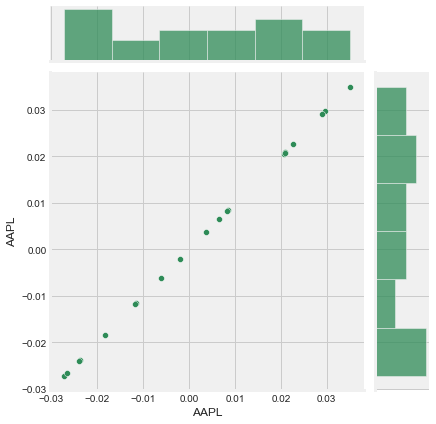

In [152]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

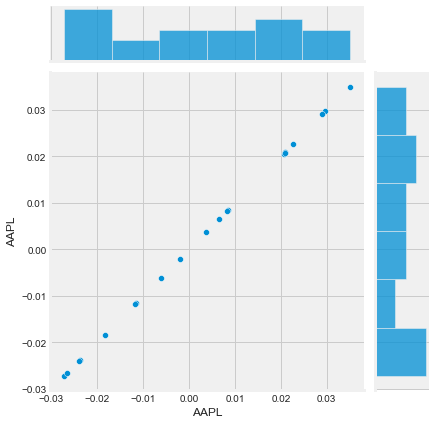

In [153]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter')

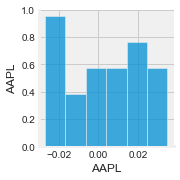

In [154]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

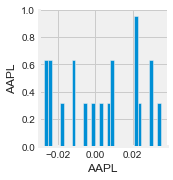

In [155]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


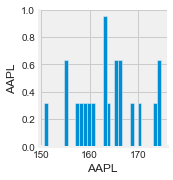

In [156]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

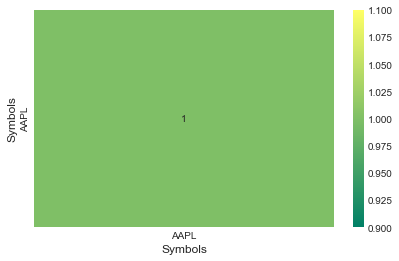

In [157]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

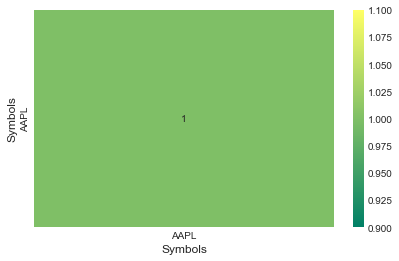

In [158]:


sns.heatmap(closing_df.corr(), annot=True, cmap='summer')


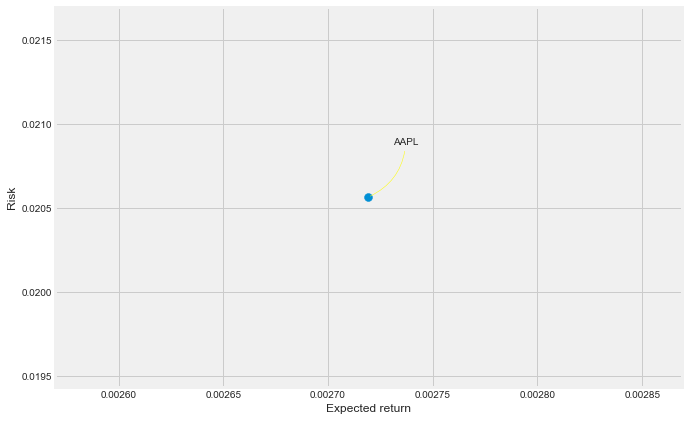

In [159]:
import numpy as np

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='yellow', connectionstyle='arc3,rad=-0.3'))


In [160]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643504
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783872
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917514
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021
...,...,...,...,...,...,...
2022-03-22,169.419998,164.910004,165.509995,168.820007,81532000.0,168.820007
2022-03-23,172.639999,167.649994,167.990005,170.210007,98062700.0,170.210007
2022-03-24,174.139999,170.210007,171.059998,174.070007,90131400.0,174.070007


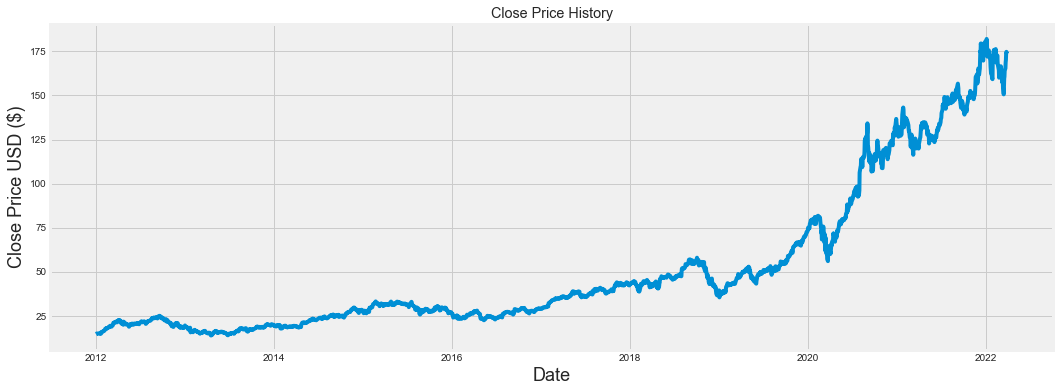

In [161]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [162]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2448

In [163]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.95275575],
       [0.95662332],
       [0.95028638]])

In [164]:


# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [165]:


from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2388/2388 [==============================] - 55s 22ms/step - loss: 0.0013


In [166]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.555509086529041

F:\Temp\ipykernel_23628\431445187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


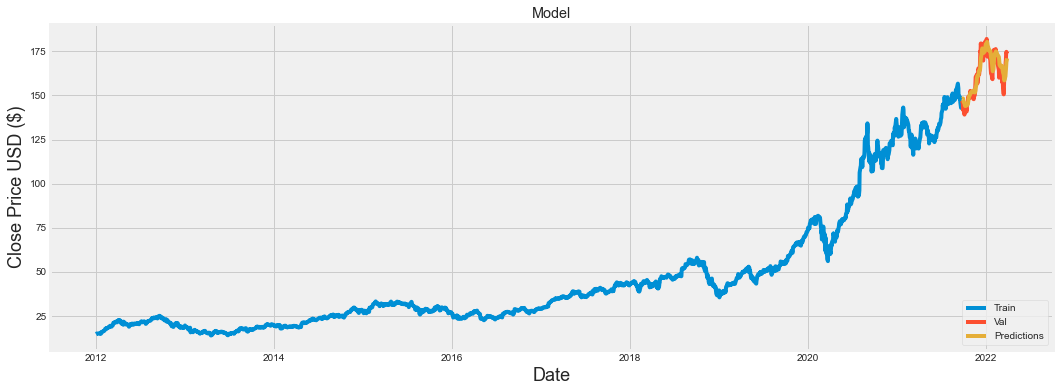

F:\Temp\ipykernel_23628\431445187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


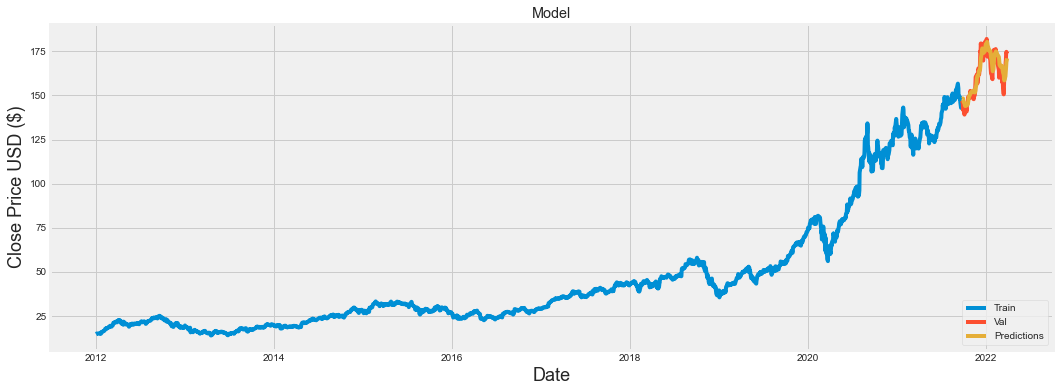

In [169]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [168]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-24,146.919998,148.103027
2021-09-27,145.369995,148.288300
2021-09-28,141.910004,148.268890
2021-09-29,142.830002,147.594116
2021-09-30,141.500000,146.950348
...,...,...
2022-03-22,168.820007,162.461563
2022-03-23,170.210007,164.527603
2022-03-24,174.070007,166.577148
